# CS-6580 Assignment 6 - Data Visualization

**Rob Christiansen**

*Weber State University*

In this assignment, you will design a visualization for a small data set and provide a rationale for your design choices.

### Dataset - U.S. Population, 1900 vs. 2000

Every 10 years, the census bureau documents the demographic make-up of the United States, influencing everything from congressional districting to social services. The dataset we will use contains a high-level summary of census data for two years a century apart: 1900 and 2000. The data is a CSV file that describes the U.S. population in terms of year, reported sex (1: male, 2: female), age group (binned into 5 year segments from 0-4 years old up to 90+ years old), and the total count of people per group. There are 38 data points per year. [Source](https://ipums.org/)

We'll start by importing our standard libraries, but if you'd like to use any others feel free to import those as well.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import gdown

In [2]:
# url = 'https://drive.google.com/uc?id=1JdFhG9E2pkVQ88-IYZ830wbj2_yMx0ut'
output = 'census2000.csv'

# gdown.download(url, output, quiet=False)

In [3]:
census_data = pd.read_csv(output)

### Your Assignment

Start by choosing a question you'd like a visualization to answer. Design a static visualization (i.e., a single image) that you believe effectively answers that question, and use the question as the title of your graphic.

Provide a short write-up (no more than 4 paragraphs, but it doesn't need to be 4 paragraphs) describing your design. While you must use the data set given, you are free to transform the data as you see fit. Such transforms may include (but are not limited to) log transformation, computing percentages or averages, grouping elements into new categories, or removing unnecessary variables or records. You are also free to incorporate external data as you see fit. Your chart image should be interpretable without recourse to your short write-up. Do not forget to include title, axis labels or legends as needed!

As different visualizations can emphasize different aspects of a data set, you should document what aspects of the data you are attempting to most effectively communicate. In short, what story are you trying to tell? Just as important, also note which aspects of the data might be obscured or down-played due to your visualization design.

In [4]:
census_data


,Sex,Year,Age,People
0,1,1900,0,4619544
1,1,2000,0,9735380
2,1,1900,5,4465783
3,1,2000,5,10552146
4,1,1900,10,4057669
...,...,...,...,...
71,2,2000,80,3221898
72,2,1900,85,48614
73,2,2000,85,1981156
74,2,1900,90,20093


In [5]:
# Determine the scale 
census_data.groupby(by=['Year']).agg({'People':sum})

,People
Year,
1900,76262821
2000,281420717


In [6]:
# We can aggregate men and women because the sex of the individuals isn't important to our analysis
census_data_both_sexes = census_data.groupby(by=['Year', 'Age']).agg({'People':sum})
census_data_both_sexes.reset_index(inplace=True)

In [12]:
# Scale the data to millions of people
census_data_both_sexes['People(mm)']  = round(census_data_both_sexes['People'] / 10**6, 1)

In [13]:
# Define dataframes based on year
mask = census_data_both_sexes['Year']==1900
data_1900 = census_data_both_sexes.loc[mask]
data_2000 = census_data_both_sexes.loc[~mask]


### Just How Big Was the Baby Boom? ###

The United States is in the midst of a massive demographic shift as millions of baby boomers leave the workforce and begin to draw upon the Social Security and Medicare resources. So just how big was the baby boom in relative terms?

Let's compare US Government Census data from 1900 to 2000. If we look at the 1900 Census, we see a fairly consistent downward trend of ages included in that census with very little variation of the rate of change. With the exception of the US Civil War, few large scale population events occured in the decades preceeding the 1900 Census. In contrast, the 2000 Census data reflects multiple wars and epidemics. If we apply the 1900 Census Age Trendline to the number of births in 2000 we can illustrate the wave of births, indeed an explosion of births, following the end of WWII in 1945, exactly 55 years earlier. In fact, baby boomers as represented by the population between the ages of 35-50 from the 2000 census above the 1900 trendline represents more people than the total US population aged 35-50 in 1900!

#### Methodology ####
This graphic was produced by retrieving the US Census data, summing the male and female population at each age, and converting the totals into a more accessible scale (millions of people). The graph itself draws upon two novel approaches: the polyfit() method from numpy to generate trendlines and the labellines library to add labels to the trendlines that follow the same axis.

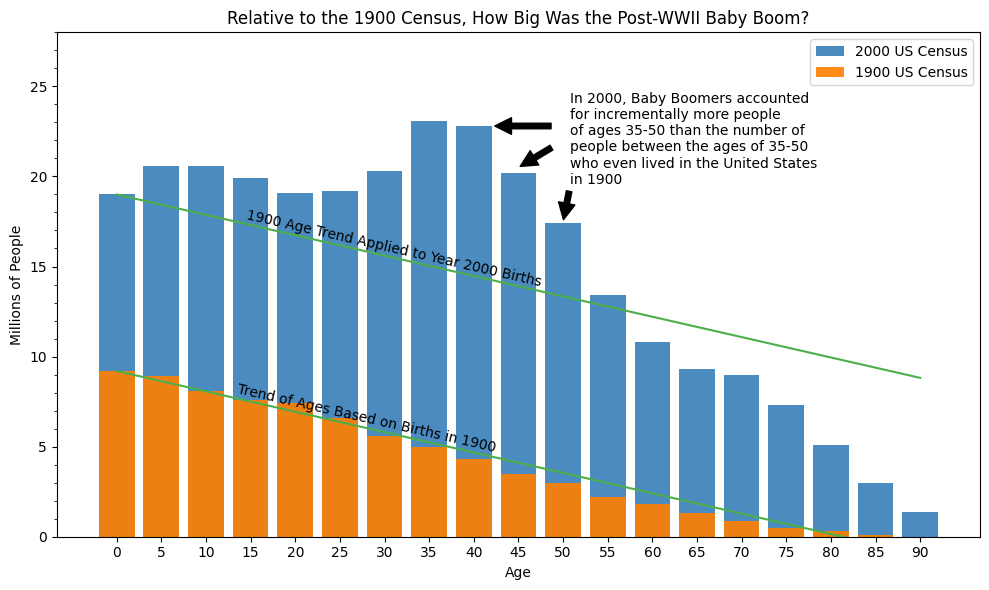

In [153]:
# Generate 
CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

# Create a list of colors with different shades of blue
ymin = 0
ymax = 28
xlabel = 'Age'
ylabel = 'Millions of People'

# Create the bar plot
plt.figure(figsize=(10, 6))

bars2 = plt.bar(data_2000['Age'], data_2000['People(mm)'], width=4, color=CB_color_cycle[0], alpha=0.9, label=f'2000 US Census')
bars1 = plt.bar(data_1900['Age'], data_1900['People(mm)'], width=4, color=CB_color_cycle[1], alpha=0.9, label=f'1900 US Census')
ax = plt.gca()
ax.set_ylim([ymin, ymax])
ax.set_xticks(data_2000['Age'])
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(1))

plt.xlabel(xlabel) 
plt.ylabel(ylabel) 
plt.title('Relative to the 1900 Census, How Big Was the Post-WWII Baby Boom?')
plt.legend()

from numpy import polyfit
x = data_1900['Age']
y = data_1900['People(mm)']
m, b = polyfit(data_1900['Age'], data_1900['People(mm)'], 1)  # Fit a linear trendline
plt.plot(x, m * x + data_1900['People(mm)'].iloc[0], label='Trend of Ages Based on Births in 1900', color=CB_color_cycle[2],) # Regression line for Year 1900
plt.plot(x, m * x + data_2000['People(mm)'].iloc[0], label='1900 Age Trend Applied to Year 2000 Births', color=CB_color_cycle[2],) # Year 1900 Regression line applied to Year 2000

ax.annotate('In 2000, Baby Boomers accounted \nfor incrementally more people \nof ages 35-50 than the number of \npeople between the ages of 35-50 \nwho even lived in the United States \nin 1900',
            xy=(50, 17.5), xycoords='data',
            xytext=(5, 25), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='bottom')

ax.annotate('',
            xy=(45, 20.5), xycoords='data',
            xytext=(25, 15), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='bottom')

ax.annotate('',
            xy=(42, 22.8), xycoords='data',
            xytext=(45, 0), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='bottom')

from labellines import labelLines
xvals = [28, 31]
lines = plt.gca().get_lines()
labelLines(lines, align=True, xvals=xvals, backgroundcolor="none",color="k", outline_color=None, yoffsets=0.5)

# Show the plot
plt.tight_layout()
plt.show()

Resources consulted:

1) Regression line concept: [SaturnCloud](https://saturncloud.io/blog/how-to-add-a-regression-line-in-python-using-matplotlib/)
1) Color Blind Friendly color cycle: [GitHub](https://gist.github.com/thriveth/8560036)
1) Annotation: [Matplotlib documentation](https://matplotlib.org/stable/gallery/text_labels_and_annotations/annotation_demo.html)
1) Labellines: [Medium](https://michael-taverner.medium.com/beautifully-annotated-line-plots-in-python-with-labellines-46376f6eaa1b)